In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
train=pd.read_csv(r"C:\Users\Lenovo\Downloads\Dataset\Dataset\Train.csv")

In [9]:
test=pd.read_csv(r"C:\Users\Lenovo\Downloads\Dataset\Dataset\Test.csv")

In [10]:
combined=pd.concat([train,test], ignore_index=True)


In [11]:
combined.head()

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,123.0,Finger Foods,Asian Fusion
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,55.0,Broths & Stews,Asian Fusion
2,1,99,c3,0,167,384.988183,388.957411,0,0,0,204.0,Smoothies & Juices,Western
3,1,95,c3,17,2,255.251864,263.923874,0,0,0,257.0,Grain Bowls,South Asian
4,1,128,c3,17,18,319.949514,326.128813,0,0,0,14.0,Appetizers,Asian Fusion


In [12]:
train.shape,test.shape,combined.shape

((321437, 13), (118070, 12), (439507, 13))

In [13]:
#numerical variables
combined.select_dtypes(include="number").columns

Index(['Period_No', 'Facility_No', 'City_Zip_Code',
       'Operational_Region_Coverage_Area', 'Billing_Amount', 'Labelled_Price',
       'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Orders_Count'],
      dtype='object')

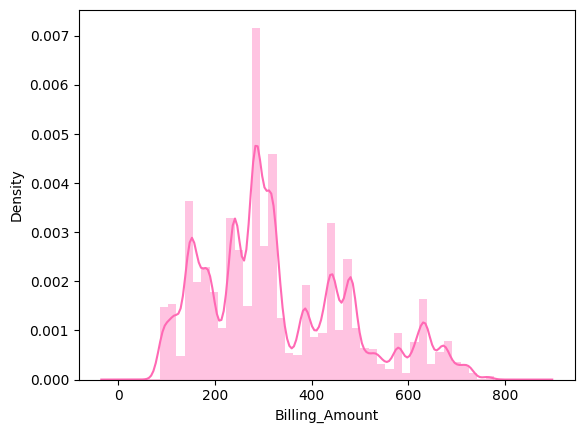

In [14]:
#Billing amount
sns.distplot(combined["Billing_Amount"],color="hotpink")
plt.show()

In [15]:
combined.Orders_Count.describe()

count    321437.000000
mean        261.533790
std         383.785233
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       13150.000000
Name: Orders_Count, dtype: float64

In [16]:
combined.columns

Index(['Period_No', 'Facility_No', 'Facility_Category', 'City_Zip_Code',
       'Operational_Region_Coverage_Area', 'Billing_Amount', 'Labelled_Price',
       'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Orders_Count',
       'Course', 'Flavour_Profile'],
      dtype='object')

In [17]:
#Top 5 Facilities
combined.Facility_No.value_counts()[:5].index

Index([63, 13, 87, 112, 36], dtype='int64', name='Facility_No')

In [18]:
top5=[63, 13, 87, 112, 36]
def facility(x):
  if x in top5:
    return ("top5")
  else:
    return ("others")
combined["Facility"]=combined.Facility_No.apply(facility)

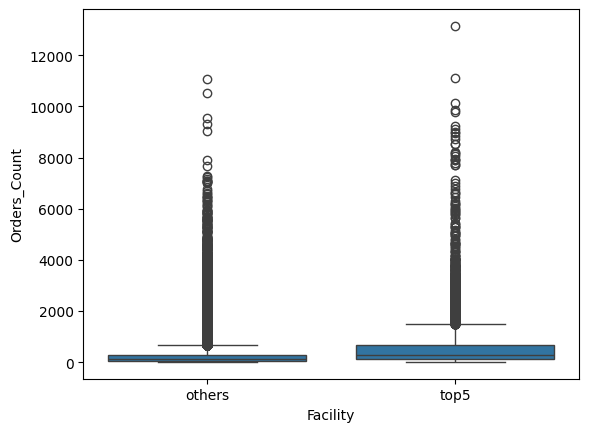

In [19]:
sns.boxplot(x="Facility",y="Orders_Count",data=combined)
plt.show()

In [20]:
combined.Operational_Region_Coverage_Area.value_counts()[:5].index

Index([62, 41, 574, 12, 1], dtype='int64', name='Operational_Region_Coverage_Area')

In [63]:
top5=[62, 41, 574, 12, 1]
def ops(x):
  if x in top5:
    return ("top5")
  else:
    return ("others")
combined["Op_Area"]=combined.Operational_Region_Coverage_Area.apply(ops)

In [66]:
combined["Op_Area"]

0         others
1           top5
2         others
3         others
4         others
           ...  
439502      top5
439503      top5
439504      top5
439505      top5
439506      top5
Name: Op_Area, Length: 439507, dtype: object

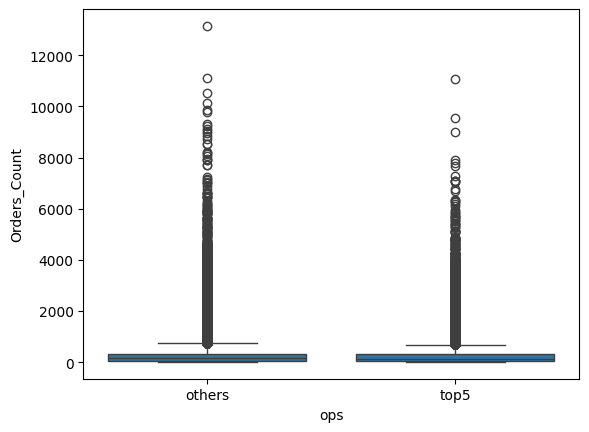

In [64]:
sns.boxplot(x="ops",y="Orders_Count",data=combined)
plt.show()

In [52]:
combined["promotions"]=combined.Custom_Promoted+combined.Promoted+combined.Search_Promotions

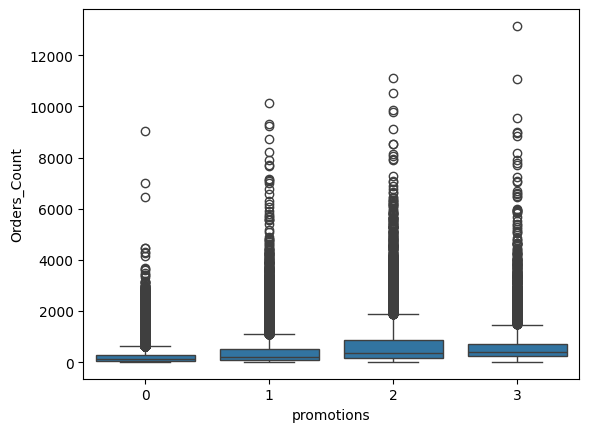

In [53]:
sns.boxplot(x="promotions",y="Orders_Count",data=combined)
plt.show()

In [25]:
combined.head()

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile,Facility,ops,promotions
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,123.0,Finger Foods,Asian Fusion,others,others,0
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,55.0,Broths & Stews,Asian Fusion,others,top5,0
2,1,99,c3,0,167,384.988183,388.957411,0,0,0,204.0,Smoothies & Juices,Western,others,others,0
3,1,95,c3,17,2,255.251864,263.923874,0,0,0,257.0,Grain Bowls,South Asian,others,others,0
4,1,128,c3,17,18,319.949514,326.128813,0,0,0,14.0,Appetizers,Asian Fusion,others,others,0


In [26]:
combined.Course.unique()

array(['Finger Foods', 'Broths & Stews', 'Smoothies & Juices',
       'Grain Bowls', 'Appetizers', 'Grilled Vegetables',
       'Sweets & Treats', 'Wraps & Rolls', 'Noodles & Veggies',
       'Fresh Greens', 'Condiments & Dips', 'Plant-Based Proteins',
       'Stir-Fried Rice', 'Flatbreads'], dtype=object)

In [27]:
combined.groupby("Flavour_Profile")["Course"].value_counts()

Flavour_Profile  Course              
Asian Fusion     Smoothies & Juices      31344
                 Appetizers              28707
                 Finger Foods            28244
                 Condiments & Dips       13020
                 Broths & Stews          12191
Mediterranean    Smoothies & Juices      32050
                 Wraps & Rolls           31951
                 Fresh Greens            28398
                 Noodles & Veggies       26523
South Asian      Grain Bowls             32048
                 Smoothies & Juices      28125
                 Sweets & Treats         28107
                 Stir-Fried Rice         19676
Western          Flatbreads              31812
                 Smoothies & Juices      31285
                 Plant-Based Proteins    25905
                 Grilled Vegetables      10121
Name: count, dtype: int64

In [56]:
#smoothies & juices ,wraps & rolls ,grain bowls
foods=["Smoothies&Juices","Wraps&Rolls","Grain Bowls","Flatbreads"]

def khana_khazana(x):
  if x in foods:
    return("Top5_Foods")
  else:
    return("other_Foods")
combined["Course_Cat"]=combined.Course.apply(khana_khazana)

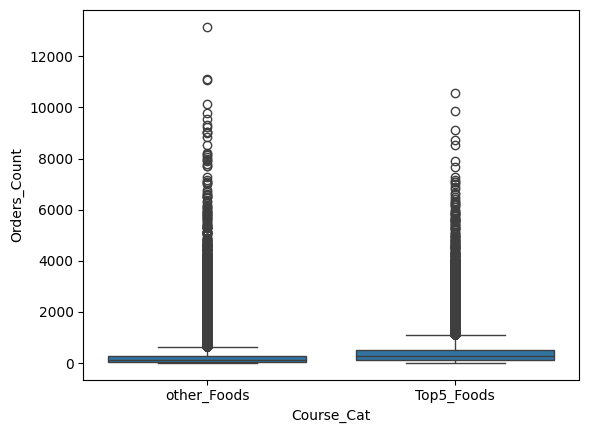

In [51]:
sns.boxplot(x="Course_Cat",y="Orders_Count",data=combined)
plt.show()

In [30]:
#Facility NO
# Facility No
combined.Facility_No.unique()
combined.groupby("Facility_No")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Facility_No,,,,,,,,
3,3847.0,179.099038,196.578163,13.0,42.0,122.0,243.0,2052.0
4,3686.0,196.133749,243.226825,13.0,41.0,123.0,270.0,3523.0
5,4171.0,282.143131,277.867416,13.0,95.0,203.0,378.0,2753.0
6,3677.0,179.811803,207.581795,13.0,41.0,121.0,244.0,2970.0
7,4218.0,195.700806,251.982207,13.0,41.0,107.0,269.0,4227.0
...,...,...,...,...,...,...,...,...
988,4314.0,278.150672,279.311236,13.0,82.0,189.0,379.0,2957.0
1476,4227.0,207.433877,243.021249,13.0,54.0,134.0,284.0,3295.0
1836,4149.0,280.976139,448.862979,13.0,41.0,108.0,379.0,7073.0


In [31]:
combined.groupby("City_Zip_Code")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
City_Zip_Code,,,,,,,,
0,134451.0,318.114131,464.342597,13.0,55.0,161.0,404.0,13150.0
17,81986.0,203.351487,263.878412,13.0,53.0,122.0,269.0,6426.0
153,4511.0,245.492795,344.797660,13.0,42.0,109.0,323.5,3849.0
357,4041.0,235.813660,489.664875,13.0,53.0,121.0,256.0,9303.0
582,21943.0,286.437224,385.943459,13.0,55.0,149.0,365.0,7073.0
601,3671.0,121.629256,132.423545,13.0,28.0,81.0,175.0,1849.0
863,4474.0,334.867456,535.232145,13.0,54.0,134.0,432.0,7155.0
977,66360.0,215.997107,289.687066,13.0,53.0,134.0,284.0,9532.0


In [32]:
combined["Magic1"]=combined.groupby("Facility_No")["Orders_Count"].transform("count")

combined["Magic2"]=combined.groupby("Facility_No")["Orders_Count"].transform("min")

combined["Magic3"]=combined.groupby("Facility_No")["Orders_Count"].transform("max")

combined["Magic4"]=combined.groupby("Facility_No")["Orders_Count"].transform("mean")

combined["Magic5"]=combined.groupby("Facility_No")["Orders_Count"].transform("median")

combined["Magic6"]=combined.groupby("Facility_No")["Orders_Count"].transform("std")

In [33]:
combined.groupby("City_Zip_Code")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
City_Zip_Code,,,,,,,,
0,134451.0,318.114131,464.342597,13.0,55.0,161.0,404.0,13150.0
17,81986.0,203.351487,263.878412,13.0,53.0,122.0,269.0,6426.0
153,4511.0,245.492795,344.797660,13.0,42.0,109.0,323.5,3849.0
357,4041.0,235.813660,489.664875,13.0,53.0,121.0,256.0,9303.0
582,21943.0,286.437224,385.943459,13.0,55.0,149.0,365.0,7073.0
601,3671.0,121.629256,132.423545,13.0,28.0,81.0,175.0,1849.0
863,4474.0,334.867456,535.232145,13.0,54.0,134.0,432.0,7155.0
977,66360.0,215.997107,289.687066,13.0,53.0,134.0,284.0,9532.0


In [34]:
combined["Magic7"]=combined.groupby("City_Zip_Code")["Orders_Count"].transform("count")

combined["Magic8"]=combined.groupby("City_Zip_Code")["Orders_Count"].transform("min")

combined["Magic9"]=combined.groupby("City_Zip_Code")["Orders_Count"].transform("max")

combined["Magic10"]=combined.groupby("City_Zip_Code")["Orders_Count"].transform("mean")

combined["Magic11"]=combined.groupby("City_Zip_Code")["Orders_Count"].transform("median")

combined["Magic12"]=combined.groupby("City_Zip_Code")["Orders_Count"].transform("std")


In [35]:
combined["Magic13"]=combined.groupby("Course")["Orders_Count"].transform("count")

combined["Magic14"]=combined.groupby("Course")["Orders_Count"].transform("min")

combined["Magic15"]=combined.groupby("Course")["Orders_Count"].transform("max")

combined["Magic16"]=combined.groupby("Course")["Orders_Count"].transform("mean")

combined["Magic17"]=combined.groupby("Course")["Orders_Count"].transform("median")

combined["Magic18"]=combined.groupby("Course")["Orders_Count"].transform("std")


In [36]:
combined["Magic19"]=combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("count")
combined["Magic20"]=combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("min")
combined["Magic21"]=combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("max")
combined["Magic22"]=combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("mean")
combined["Magic23"]=combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("median")
combined["Magic24"]=combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("std")

In [37]:
pd.set_option("display.max_columns",50)
combined.head(2)

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile,Facility,ops,promotions,Course_cat,Magic1,Magic2,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12,Magic13,Magic14,Magic15,Magic16,Magic17,Magic18,Magic19,Magic20,Magic21,Magic22,Magic23,Magic24
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,123.0,Finger Foods,Asian Fusion,others,others,0,other_Foods,4118,13.0,3374.0,207.096163,134.0,258.871277,66360,13.0,9532.0,215.997107,134.0,289.687066,20895,13.0,2404.0,164.194783,121.0,164.063729,18103,13.0,10544.0,313.646523,148.0,473.337118
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,55.0,Broths & Stews,Asian Fusion,others,top5,0,other_Foods,4298,13.0,7088.0,257.586087,109.0,430.839680,134451,13.0,13150.0,318.114131,161.0,464.342597,8889,13.0,689.0,88.900551,68.0,72.350096,36987,13.0,9532.0,222.396247,122.0,329.431315


In [38]:
combined.columns

Index(['Period_No', 'Facility_No', 'Facility_Category', 'City_Zip_Code',
       'Operational_Region_Coverage_Area', 'Billing_Amount', 'Labelled_Price',
       'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Orders_Count',
       'Course', 'Flavour_Profile', 'Facility', 'ops', 'promotions',
       'Course_cat', 'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5',
       'Magic6', 'Magic7', 'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12',
       'Magic13', 'Magic14', 'Magic15', 'Magic16', 'Magic17', 'Magic18',
       'Magic19', 'Magic20', 'Magic21', 'Magic22', 'Magic23', 'Magic24'],
      dtype='object')

In [39]:
#period_no is time series data
new=combined.drop(['Period_No', 'Facility_No', 'Facility_Category', 'City_Zip_Code',
       'Operational_Region_Coverage_Area','Custom_Promoted', 'Promoted', 'Search_Promotions','Course'],axis=1)

In [40]:
#split the data into train and test
newtrain=new.loc[0:train.shape[0]-1,:]
newtest=new.loc[train.shape[0]:,:]

In [41]:
nums=[ 'Billing_Amount', 'Labelled_Price',
      'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5',
       'Magic6', 'Magic7', 'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12',
       'Magic13', 'Magic14', 'Magic15', 'Magic16', 'Magic17', 'Magic18',
       'Magic19', 'Magic20', 'Magic21', 'Magic22', 'Magic23', 'Magic24']

In [42]:
import scipy.stats as stats
pvals=[]

for i in nums:
  tstat,pval=stats.ttest_ind(newtrain.loc[:,i],newtrain.Orders_Count)
  pvals.append(pval)

In [43]:
pd.DataFrame(pval,index=nums,columns=["Pvalue"])

,Pvalue
Billing_Amount,0.0
Labelled_Price,0.0
Magic1,0.0
Magic2,0.0
Magic3,0.0
Magic4,0.0
Magic5,0.0
Magic6,0.0
Magic7,0.0
Magic8,0.0


In [59]:
combined.columns

Index(['Period_No', 'Facility_No', 'Facility_Category', 'City_Zip_Code',
       'Operational_Region_Coverage_Area', 'Billing_Amount', 'Labelled_Price',
       'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Orders_Count',
       'Course', 'Flavour_Profile', 'Facility', 'ops', 'promotions',
       'Course_cat', 'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5',
       'Magic6', 'Magic7', 'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12',
       'Magic13', 'Magic14', 'Magic15', 'Magic16', 'Magic17', 'Magic18',
       'Magic19', 'Magic20', 'Magic21', 'Magic22', 'Magic23', 'Magic24',
       'Course_Cat', 'Op_Area'],
      dtype='object')

In [68]:
#Anova
cats=['Facility', 'ops', 'promotions', 'Course_cat']

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model= sfa.ols("Orders_Count~Facility+ops+promotions+Course_cat",data= newtrain).fit()
anova_lm(model)



,df,sum_sq,mean_sq,F,PR(>F)
Facility,1.0,1.605818e+09,1.605818e+09,12752.277266,0.000000
ops,1.0,9.465816e+05,9.465816e+05,7.517086,0.006112
Course_cat,1.0,1.349381e+09,1.349381e+09,10715.833407,0.000000
promotions,1.0,3.912517e+09,3.912517e+09,31070.463403,0.000000
Residual,321432.0,4.047600e+10,1.259240e+05,NaN,NaN


In [71]:
newtrain.to_csv("submission.csv",index=False)